Extract data from txt files. 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]
train=pd.read_csv("train_FD002.txt",sep=" ",names=columns)
test=pd.read_csv("test_FD002.txt",sep=" ",names=columns)
results=pd.read_csv("RUL_FD002.txt",sep=" ",header=None)

In [3]:
train

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


In [4]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [5]:
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN


Find number of machines

In [6]:
machine_id_list = train.id.unique().tolist()
machine_id_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

Remove unncessary features. 

In [7]:
train = train.drop(["op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19", "sensor22", "sensor23"], axis=1)
train

,id,cycle,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,34.9983,0.8400,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,8048.56,9.3461,334,14.73,8.8071
1,1,2,41.9982,0.8408,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,8072.30,9.3774,330,10.41,6.2665
2,1,3,24.9988,0.6218,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,7864.87,10.8941,309,14.08,8.6723
3,1,4,42.0077,0.8416,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,8068.66,9.3528,329,10.59,6.4701
4,1,5,25.0005,0.6203,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,7861.23,10.8963,309,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,8169.64,9.3035,369,24.36,14.5189
53755,260,313,10.0022,0.2510,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,8245.36,8.7586,374,28.10,16.9454
53756,260,314,25.0041,0.6200,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,7971.25,11.0657,310,14.19,8.5503
53757,260,315,25.0033,0.6220,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,7972.47,11.0537,311,14.05,8.3729


In [8]:
list_machine_cycle = train.groupby('id')['cycle'].max()
list_machine_cycle

id
1      149
2      269
3      206
4      235
5      154
      ... 
256    163
257    309
258    143
259    205
260    316
Name: cycle, Length: 260, dtype: int64

In [9]:
min_cycle = int(min(list_machine_cycle))
min_cycle

128

Since there are no RUL values for the test set, I will take 20% of the training set as test set. Extract test set before scaling. 

In [10]:
num_machines = len(machine_id_list)
num_train = int(0.8*num_machines)
num_test = int(0.2*num_machines)
num_rows = int(train.shape[0])

train_test_split_index = 0

for index, row in train.iterrows():
    machineIndex = int(row['id'])
    target = int(num_train+1)
    if machineIndex == target:
        train_test_split_index = index
        break

test_set = train.tail(num_rows-train_test_split_index+1)
train = train.head(train_test_split_index-1)

Scale features with StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
#train
train_values_df = train.drop(["id", "cycle"], axis=1)
train_values_array = train_values_df.to_numpy()

#test
test_values_df = test_set.drop(["id", "cycle"], axis=1)
test_values_array = test_values_df.to_numpy()

#scaling
scaler = StandardScaler().fit(train_values_array)
train_scaled = scaler.transform(train_values_array) #training set
test_scaled = scaler.transform(test_values_array)

#combine for training set
train_id = np.array([train['id'].tolist()]).transpose()
train_cycle = np.array([train['cycle'].tolist()]).transpose()
train_array = np.concatenate((train_id, train_cycle, train_scaled), axis=1)

column_names = ["id", "cycle", "op1", "op2", "sensor2", "sensor3", "sensor4", "sensor7", "sensor8", "sensor9", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor17", "sensor20", "sensor21"]
train = pd.DataFrame(data=train_array, columns=column_names)

#combine for test set
test_id = np.array([test_set['id'].tolist()]).transpose()
test_cycle = np.array([test_set['cycle'].tolist()]).transpose()
test_array = np.concatenate((test_id, test_cycle, test_scaled), axis=1)

test_set = pd.DataFrame(data=test_array, columns=column_names)

Split dataframe into separate dataframes of the same machineID

Training set

In [12]:
grouped = train.groupby(train.id)
print("grouped")
print(grouped)
train_array = np.array([])
train_machine_id_list = machine_id_list[:num_train]
for machine in train_machine_id_list:
    machineDf = grouped.get_group(machine)
    machineDf.drop(["id","cycle"], axis=1, inplace=True)
    machineDf = machineDf.head(min_cycle)
    machine_arr = machineDf.to_numpy()
    if train_array.shape[0]:
        train_array = np.vstack((train_array, [machine_arr]))
        print(train_array.shape)
    else:
        train_array = np.array([machine_arr])

grouped
(2, 128, 16)
(3, 128, 16)
(4, 128, 16)
(5, 128, 16)
(6, 128, 16)
(7, 128, 16)
(8, 128, 16)
(9, 128, 16)
(10, 128, 16)
(11, 128, 16)
(12, 128, 16)
(13, 128, 16)
(14, 128, 16)
(15, 128, 16)
(16, 128, 16)
(17, 128, 16)
(18, 128, 16)
(19, 128, 16)
(20, 128, 16)
(21, 128, 16)
(22, 128, 16)
(23, 128, 16)
(24, 128, 16)
(25, 128, 16)
(26, 128, 16)
(27, 128, 16)
(28, 128, 16)
(29, 128, 16)
(30, 128, 16)
(31, 128, 16)
(32, 128, 16)
(33, 128, 16)
(34, 128, 16)
(35, 128, 16)
(36, 128, 16)
(37, 128, 16)
(38, 128, 16)
(39, 128, 16)
(40, 128, 16)
(41, 128, 16)
(42, 128, 16)
(43, 128, 16)
(44, 128, 16)
(45, 128, 16)
(46, 128, 16)
(47, 128, 16)
(48, 128, 16)
(49, 128, 16)
(50, 128, 16)
(51, 128, 16)
(52, 128, 16)
(53, 128, 16)
(54, 128, 16)
(55, 128, 16)
(56, 128, 16)
(57, 128, 16)
(58, 128, 16)
(59, 128, 16)
(60, 128, 16)


C:\Users\NG ZHI QING\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(61, 128, 16)
(62, 128, 16)
(63, 128, 16)
(64, 128, 16)
(65, 128, 16)
(66, 128, 16)
(67, 128, 16)
(68, 128, 16)
(69, 128, 16)
(70, 128, 16)
(71, 128, 16)
(72, 128, 16)
(73, 128, 16)
(74, 128, 16)
(75, 128, 16)
(76, 128, 16)
(77, 128, 16)
(78, 128, 16)
(79, 128, 16)
(80, 128, 16)
(81, 128, 16)
(82, 128, 16)
(83, 128, 16)
(84, 128, 16)
(85, 128, 16)
(86, 128, 16)
(87, 128, 16)
(88, 128, 16)
(89, 128, 16)
(90, 128, 16)
(91, 128, 16)
(92, 128, 16)
(93, 128, 16)
(94, 128, 16)
(95, 128, 16)
(96, 128, 16)
(97, 128, 16)
(98, 128, 16)
(99, 128, 16)
(100, 128, 16)
(101, 128, 16)
(102, 128, 16)
(103, 128, 16)
(104, 128, 16)
(105, 128, 16)
(106, 128, 16)
(107, 128, 16)
(108, 128, 16)
(109, 128, 16)
(110, 128, 16)
(111, 128, 16)
(112, 128, 16)
(113, 128, 16)
(114, 128, 16)
(115, 128, 16)
(116, 128, 16)
(117, 128, 16)
(118, 128, 16)
(119, 128, 16)
(120, 128, 16)
(121, 128, 16)
(122, 128, 16)
(123, 128, 16)
(124, 128, 16)
(125, 128, 16)
(126, 128, 16)
(127, 128, 16)
(128, 128, 16)
(129, 128, 16)
(130

In [13]:
train_array.shape

(208, 128, 16)

Test set

In [14]:
test_grouped = test_set.groupby(test_set.id)
test_array = np.array([])
test_machine_id_list = machine_id_list[num_train:]
for machine in test_machine_id_list:
    test_machineDf = test_grouped.get_group(machine)
    test_machineDf.drop(["id","cycle"], axis=1, inplace=True)
    test_machineDf = test_machineDf.head(min_cycle)
    test_machine_arr = test_machineDf.to_numpy()
    if test_array.shape[0]:
        test_array = np.vstack((test_array, [test_machine_arr]))
        print(test_array.shape)
    else:
        test_array = np.array([test_machine_arr])

(2, 128, 16)
(3, 128, 16)
(4, 128, 16)
(5, 128, 16)
(6, 128, 16)
(7, 128, 16)
(8, 128, 16)
(9, 128, 16)
(10, 128, 16)
(11, 128, 16)
(12, 128, 16)
(13, 128, 16)
(14, 128, 16)
(15, 128, 16)
(16, 128, 16)
(17, 128, 16)
(18, 128, 16)
(19, 128, 16)
(20, 128, 16)
(21, 128, 16)
(22, 128, 16)
(23, 128, 16)
(24, 128, 16)
(25, 128, 16)
(26, 128, 16)
(27, 128, 16)
(28, 128, 16)
(29, 128, 16)
(30, 128, 16)
(31, 128, 16)
(32, 128, 16)
(33, 128, 16)
(34, 128, 16)
(35, 128, 16)
(36, 128, 16)
(37, 128, 16)
(38, 128, 16)
(39, 128, 16)
(40, 128, 16)
(41, 128, 16)
(42, 128, 16)
(43, 128, 16)
(44, 128, 16)
(45, 128, 16)
(46, 128, 16)
(47, 128, 16)
(48, 128, 16)
(49, 128, 16)
(50, 128, 16)
(51, 128, 16)
(52, 128, 16)


In [15]:
test_array.shape

(52, 128, 16)

Generate labels for dataset

In [16]:
rul_data = pd.DataFrame(list_machine_cycle).reset_index()
rul_data.columns = ['id', 'max']
rul_data.head()

,id,max
0,1,149
1,2,269
2,3,206
3,4,235
4,5,154


Training set

In [17]:
training_rul_list = []
for machine in train_machine_id_list:
    row = rul_data.loc[rul_data['id'] == machine]
    rul = row['max'] - min_cycle
    training_rul_list.append(rul)
training_rul_array = np.array(training_rul_list)
training_rul_array

array([[ 21],
       [141],
       [ 78],
       [107],
       [ 26],
       [ 47],
       [ 46],
       [ 23],
       [ 71],
       [ 56],
       [143],
       [121],
       [ 99],
       [ 65],
       [ 81],
       [ 26],
       [ 52],
       [ 81],
       [ 35],
       [ 26],
       [ 61],
       [ 64],
       [ 83],
       [ 63],
       [ 77],
       [ 59],
       [ 48],
       [ 72],
       [ 23],
       [ 38],
       [215],
       [153],
       [ 67],
       [ 77],
       [ 68],
       [ 75],
       [ 82],
       [ 49],
       [ 86],
       [ 65],
       [134],
       [ 93],
       [ 83],
       [ 77],
       [ 23],
       [ 73],
       [118],
       [111],
       [ 40],
       [ 94],
       [165],
       [ 46],
       [ 20],
       [ 71],
       [ 31],
       [ 35],
       [ 12],
       [ 34],
       [ 66],
       [ 49],
       [ 90],
       [ 56],
       [ 40],
       [154],
       [ 78],
       [ 42],
       [ 17],
       [ 57],
       [  8],
       [ 28],
       [ 66],
      

In [18]:
training_rul_array.shape

(208, 1)

Test set

In [19]:
test_rul_list = []
for machine in test_machine_id_list:
    row = rul_data.loc[rul_data['id'] == machine]
    rul = row['max'] - min_cycle
    test_rul_list.append(rul)
test_rul_array = np.array(test_rul_list)
test_rul_array

array([[ 73],
       [ 56],
       [ 86],
       [ 21],
       [ 68],
       [ 18],
       [ 98],
       [101],
       [ 34],
       [109],
       [ 28],
       [106],
       [ 50],
       [ 67],
       [ 90],
       [ 46],
       [ 28],
       [ 50],
       [ 56],
       [134],
       [ 48],
       [ 58],
       [ 16],
       [114],
       [ 62],
       [ 31],
       [ 55],
       [111],
       [ 81],
       [ 28],
       [135],
       [138],
       [ 55],
       [145],
       [102],
       [  0],
       [125],
       [ 66],
       [ 69],
       [106],
       [ 74],
       [ 56],
       [138],
       [  7],
       [ 21],
       [132],
       [212],
       [ 35],
       [181],
       [ 15],
       [ 77],
       [188]], dtype=int64)

In [20]:
test_rul_array.shape

(52, 1)

Training model with LSTM 

In [21]:
model = keras.models.Sequential()
model.add(layers.LSTM(12, input_shape=(None,16)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12)                1392      
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[tf.keras.metrics.MeanSquaredError()])
learning_model = model.fit(train_array, training_rul_array, epochs=500, batch_size=32)

Epoch 1/500
7/7 [==============================] - 5s 73ms/step - loss: 8422.2871 - mean_squared_error: 8422.2871
Epoch 2/500
7/7 [==============================] - 0s 66ms/step - loss: 8418.0049 - mean_squared_error: 8418.0049
Epoch 3/500
7/7 [==============================] - 1s 82ms/step - loss: 8411.2930 - mean_squared_error: 8411.2930
Epoch 4/500
7/7 [==============================] - 1s 111ms/step - loss: 8406.0439 - mean_squared_error: 8406.0439
Epoch 5/500
7/7 [==============================] - 1s 78ms/step - loss: 8396.8359 - mean_squared_error: 8396.8359
Epoch 6/500
7/7 [==============================] - 1s 73ms/step - loss: 8385.4053 - mean_squared_error: 8385.4053
Epoch 7/500
7/7 [==============================] - 1s 72ms/step - loss: 8371.7383 - mean_squared_error: 8371.7383
Epoch 8/500
7/7 [==============================] - 0s 67ms/step - loss: 8354.8574 - mean_squared_error: 8354.8574
Epoch 9/500
7/7 [==============================] - 1s 76ms/step - loss: 8338.8174 - mea

7/7 [==============================] - 0s 70ms/step - loss: 2333.2612 - mean_squared_error: 2333.2612
Epoch 142/500
7/7 [==============================] - 1s 77ms/step - loss: 2349.8877 - mean_squared_error: 2349.8877
Epoch 143/500
7/7 [==============================] - 1s 72ms/step - loss: 2201.6499 - mean_squared_error: 2201.6499
Epoch 144/500
7/7 [==============================] - 0s 69ms/step - loss: 2303.4182 - mean_squared_error: 2303.4182
Epoch 145/500
7/7 [==============================] - 0s 63ms/step - loss: 2352.1047 - mean_squared_error: 2352.1047
Epoch 146/500
7/7 [==============================] - 0s 63ms/step - loss: 2275.3972 - mean_squared_error: 2275.3972
Epoch 147/500
7/7 [==============================] - 0s 70ms/step - loss: 2374.8030 - mean_squared_error: 2374.8030
Epoch 148/500
7/7 [==============================] - 0s 64ms/step - loss: 2257.8225 - mean_squared_error: 2257.8225
Epoch 149/500
7/7 [==============================] - 1s 88ms/step - loss: 2285.7366 - 

7/7 [==============================] - 1s 96ms/step - loss: 1784.5408 - mean_squared_error: 1784.5408
Epoch 282/500
7/7 [==============================] - 1s 82ms/step - loss: 1866.1101 - mean_squared_error: 1866.1101
Epoch 283/500
7/7 [==============================] - 1s 93ms/step - loss: 1799.7937 - mean_squared_error: 1799.7937
Epoch 284/500
7/7 [==============================] - 1s 86ms/step - loss: 1746.9648 - mean_squared_error: 1746.9648
Epoch 285/500
7/7 [==============================] - 1s 131ms/step - loss: 1730.6409 - mean_squared_error: 1730.6409
Epoch 286/500
7/7 [==============================] - 1s 87ms/step - loss: 1870.3331 - mean_squared_error: 1870.3331
Epoch 287/500
7/7 [==============================] - 0s 68ms/step - loss: 1607.0601 - mean_squared_error: 1607.0601
Epoch 288/500
7/7 [==============================] - 0s 68ms/step - loss: 1764.6450 - mean_squared_error: 1764.6450
Epoch 289/500
7/7 [==============================] - 0s 59ms/step - loss: 1752.7277 -

7/7 [==============================] - 1s 83ms/step - loss: 1297.5763 - mean_squared_error: 1297.5763
Epoch 422/500
7/7 [==============================] - 1s 78ms/step - loss: 1282.6150 - mean_squared_error: 1282.6150
Epoch 423/500
7/7 [==============================] - 1s 85ms/step - loss: 1220.4504 - mean_squared_error: 1220.4504
Epoch 424/500
7/7 [==============================] - 1s 83ms/step - loss: 1246.7076 - mean_squared_error: 1246.7076
Epoch 425/500
7/7 [==============================] - 1s 78ms/step - loss: 1200.9290 - mean_squared_error: 1200.9290
Epoch 426/500
7/7 [==============================] - 1s 74ms/step - loss: 1256.6753 - mean_squared_error: 1256.6753
Epoch 427/500
7/7 [==============================] - 1s 79ms/step - loss: 1214.8738 - mean_squared_error: 1214.8738
Epoch 428/500
7/7 [==============================] - 1s 82ms/step - loss: 1227.6802 - mean_squared_error: 1227.6802
Epoch 429/500
7/7 [==============================] - 1s 98ms/step - loss: 1147.1141 - 

7/7 [==============================] - 0s 61ms/step - loss: 1271.1711 - mean_squared_error: 1271.1711
Epoch 492/500
7/7 [==============================] - 0s 68ms/step - loss: 1220.2720 - mean_squared_error: 1220.2720
Epoch 493/500
7/7 [==============================] - 1s 81ms/step - loss: 1283.6497 - mean_squared_error: 1283.6497
Epoch 494/500
7/7 [==============================] - 1s 76ms/step - loss: 1222.2996 - mean_squared_error: 1222.2996
Epoch 495/500
7/7 [==============================] - 0s 69ms/step - loss: 1221.6940 - mean_squared_error: 1221.6940
Epoch 496/500
7/7 [==============================] - 1s 77ms/step - loss: 1081.9470 - mean_squared_error: 1081.9470
Epoch 497/500
7/7 [==============================] - 0s 68ms/step - loss: 1232.7039 - mean_squared_error: 1232.7039
Epoch 498/500
7/7 [==============================] - 0s 61ms/step - loss: 1088.9081 - mean_squared_error: 1088.9081s - loss: 1125.8584 - mean_squared_error: 112
Epoch 499/500
7/7 [======================

In [23]:
trainPredict = model.predict(train_array)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(training_rul_array, trainPredict))
trainR2Score = r2_score(training_rul_array, trainPredict)
print('Train Score: %.2f RMSE %.4f R2 Score' % (trainScore, trainR2Score))

Train Score: 31.87 RMSE 0.5267 R2 Score


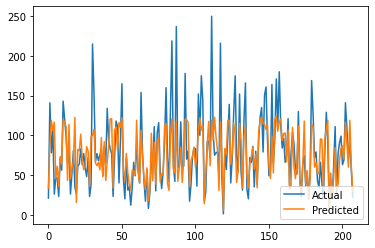

In [24]:
plt.plot(training_rul_array)
plt.plot(trainPredict)
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()

Test set performance 

In [25]:
testPredict = model.predict(test_array)
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(test_rul_array, testPredict))
testR2Score = r2_score(test_rul_array, testPredict)
print('Test Score: %.2f RMSE %.4f R2 Score' % (testScore, testR2Score))

Test Score: 41.02 RMSE 0.2714 R2 Score


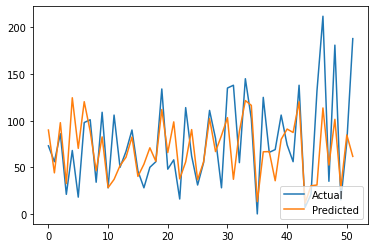

In [26]:
plt.plot(test_rul_array)
plt.plot(testPredict)
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.show()